# Debunking Hoax Regarding Covid-19 Vaccine Causing Monkeypox
- Authors: Gian Luky S. & Daud M. Azhari
- Date: September 2023

*should've had smoothed the response variable

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import datetime

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import mutual_info_classif
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score, RepeatedKFold
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer, OrdinalEncoder, OneHotEncoder, RobustScaler
from sklearn.metrics import mean_squared_error

In [2]:
df1 = pd.read_csv("/kaggle/input/datadd23/Data Penyakit Cacar Monyet di Dunia.csv", sep=";")
df2 = pd.read_csv("/kaggle/input/datadd23/Data Vaksin Booster di Dunia.csv", sep=";")
print(df1.columns)
df1["date"] = pd.to_datetime(df1["date"], format="%d/%m/%Y")
df2["date"] = pd.to_datetime(df2["date"], format="%d/%m/%Y")


# df1 checker
var1 = ['iso_code', 'date', 'total_cases_per_million']
df1 = df1[var1]

# df2
var2 = ['iso_code', 'continent', 'date', 'reproduction_rate', 'positive_rate', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed_per_hundred', 'stringency_index', 'population_density', 
        'median_age', 'aged_65_older', 'aged_70_older','gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers','handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']
df2 = df2[var2]
df2["population_density"] = df2.population_density.astype("str").str.replace(".", "").astype("float64")
df2["gdp_per_capita"] = df2.gdp_per_capita.astype("str").str.replace(".", "").astype("float64")

df3 = df2.copy()
df3["t30"] = df3.date - datetime.timedelta(days=30)
df3["t90"] = df3.date - datetime.timedelta(days=90)

/tmp/ipykernel_32/2594374528.py:2: DtypeWarning: Columns (6,9,11,12,13,20,27,48,63,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("/kaggle/input/datadd23/Data Vaksin Booster di Dunia.csv", sep=";")


Index(['location', 'iso_code', 'date', 'total_cases', 'total_deaths',
       'new_cases', 'new_deaths', 'new_cases_smoothed', 'new_deaths_smoothed',
       'new_cases_per_million', 'total_cases_per_million',
       'new_cases_smoothed_per_million', 'new_deaths_per_million',
       'total_deaths_per_million', 'new_deaths_smoothed_per_million'],
      dtype='object')


###

In [41]:
display(df1.info(), df2.info())
df1.head() #keknya aman
display(df2.head().transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47122 entries, 0 to 47121
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   iso_code                 47122 non-null  object        
 1   date                     47122 non-null  datetime64[ns]
 2   total_cases_per_million  47122 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339644 entries, 0 to 339643
Data columns (total 23 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    339644 non-null  object        
 1   continent                                   323479 non-null  object        
 2   date                                        339644 non-null  datetime64[ns]


None

None

,0,1,2,3,4
iso_code,AFG,AFG,AFG,AFG,AFG
continent,Asia,Asia,Asia,Asia,Asia
date,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00
reproduction_rate,NaN,NaN,NaN,NaN,NaN
positive_rate,NaN,NaN,NaN,NaN,NaN
people_fully_vaccinated_per_hundred,NaN,NaN,NaN,NaN,NaN
new_vaccinations_smoothed_per_million,NaN,NaN,NaN,NaN,NaN
new_people_vaccinated_smoothed_per_hundred,NaN,NaN,NaN,NaN,NaN
stringency_index,0.0,0.0,0.0,0.0,0.0
population_density,54422.0,54422.0,54422.0,54422.0,54422.0


<Axes: >

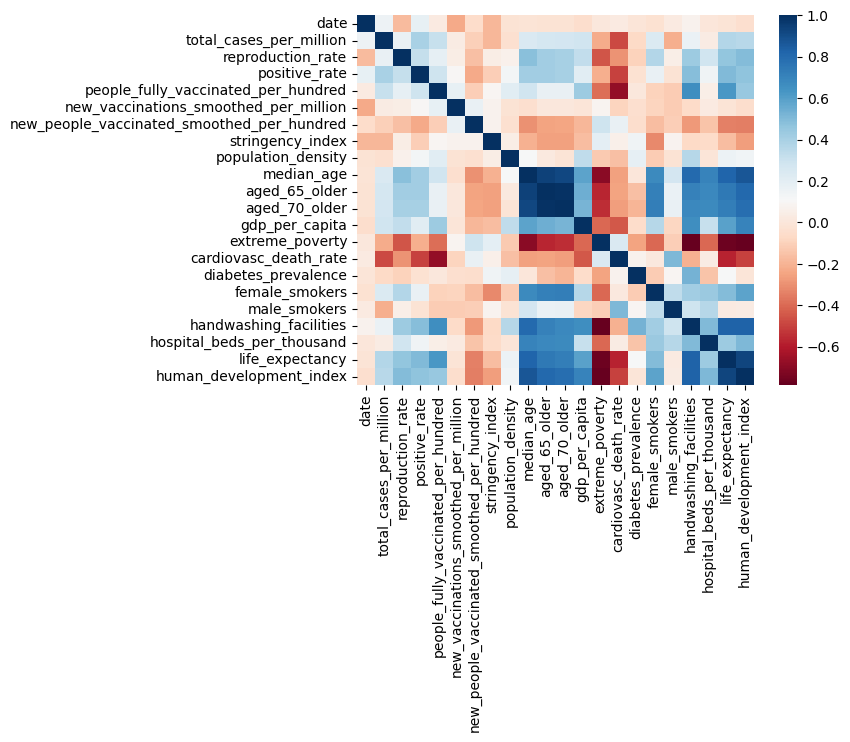

In [4]:
dfm1 = pd.merge(df1, df2, on=["date", "iso_code"], how="left")
dfm1 = dfm1[~dfm1.iso_code.str.startswith("OWID")]
dfm1.head(10).transpose()

# dfm2 =  pd.merge(df2.loc[df2.iso_code=="OWID_WRL", ["date", 'reproduction_rate', 'positive_rate', 'people_fully_vaccinated_per_hundred',
#        'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed_per_hundred']],
#          df1[df1.iso_code=="OWID_WRL"],
#          on="date", how="left")

plt.figure()
sns.heatmap(dfm1.select_dtypes(exclude="object").corr(), cmap="RdBu", annot=False)

iso_code                                       0.000000
date                                           0.000000
total_cases_per_million                        0.000000
continent                                      0.589863
new_vaccinations_smoothed_per_million         39.424770
new_people_vaccinated_smoothed_per_hundred    38.965226
population_density                             2.450902
median_age                                     7.018908
aged_65_older                                  8.879947
aged_70_older                                  8.955394
gdp_per_capita                                 8.907382
extreme_poverty                               35.430623
cardiovasc_death_rate                          7.853403
diabetes_prevalence                            4.421683
female_smokers                                18.445781
male_smokers                                  20.345687
hospital_beds_per_thousand                    13.297058
life_expectancy                                0

iso_code                                       0.000000
date                                           0.000000
total_cases_per_million                        0.000000
continent                                      0.000000
new_vaccinations_smoothed_per_million         39.424770
new_people_vaccinated_smoothed_per_hundred    38.965226
population_density                             1.890761
median_age                                     6.470198
aged_65_older                                  8.358673
aged_70_older                                  8.422689
gdp_per_capita                                 8.392967
extreme_poverty                               35.076248
cardiovasc_death_rate                          7.338988
diabetes_prevalence                            3.877546
female_smokers                                18.043394
male_smokers                                  19.963877
hospital_beds_per_thousand                    12.823796
life_expectancy                                0

iso_code                                       0.000000
date                                           0.000000
total_cases_per_million                        0.000000
continent                                      0.000000
new_vaccinations_smoothed_per_million         39.424770
new_people_vaccinated_smoothed_per_hundred    38.965226
population_density                             0.000000
median_age                                     0.000000
aged_65_older                                  0.000000
aged_70_older                                  0.000000
gdp_per_capita                                 0.000000
extreme_poverty                                0.000000
cardiovasc_death_rate                          0.000000
diabetes_prevalence                            0.000000
female_smokers                                 0.000000
male_smokers                                   0.000000
hospital_beds_per_thousand                     0.000000
life_expectancy                                0

,iso_code,date,total_cases_per_million,continent,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed_per_hundred,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
46610,VNM,2023-06-30,0.020,Asia,20.0,0.0,308127.0,32.6,7.15,4.718,6171884.0,2.0,245.465,6.0,1.0,45.9,2.6,75.4,0.704
46611,VNM,2023-07-01,0.020,Asia,NaN,NaN,308127.0,32.6,7.15,4.718,6171884.0,2.0,245.465,6.0,1.0,45.9,2.6,75.4,0.704
46612,VNM,2023-07-02,0.020,Asia,NaN,NaN,308127.0,32.6,7.15,4.718,6171884.0,2.0,245.465,6.0,1.0,45.9,2.6,75.4,0.704
46613,VNM,2023-07-03,0.020,Asia,NaN,NaN,308127.0,32.6,7.15,4.718,6171884.0,2.0,245.465,6.0,1.0,45.9,2.6,75.4,0.704
46614,VNM,2023-07-04,0.020,Asia,NaN,NaN,308127.0,32.6,7.15,4.718,6171884.0,2.0,245.465,6.0,1.0,45.9,2.6,75.4,0.704
46615,VNM,2023-07-05,0.020,Asia,NaN,NaN,308127.0,32.6,7.15,4.718,6171884.0,2.0,245.465,6.0,1.0,45.9,2.6,75.4,0.704
46616,VNM,2023-07-06,0.020,Asia,NaN,NaN,308127.0,32.6,7.15,4.718,6171884.0,2.0,245.465,6.0,1.0,45.9,2.6,75.4,0.704
46617,VNM,2023-07-07,0.020,Asia,NaN,NaN,308127.0,32.6,7.15,4.718,6171884.0,2.0,245.465,6.0,1.0,45.9,2.6,75.4,0.704
46618,VNM,2023-07-08,0.020,Asia,NaN,NaN,308127.0,32.6,7.15,4.718,6171884.0,2.0,245.465,6.0,1.0,45.9,2.6,75.4,0.704
46619,VNM,2023-07-09,0.020,Asia,NaN,NaN,308127.0,32.6,7.15,4.718,6171884.0,2.0,245.465,6.0,1.0,45.9,2.6,75.4,0.704


iso_code                                      0.0
date                                          0.0
total_cases_per_million                       0.0
continent                                     0.0
new_vaccinations_smoothed_per_million         0.0
new_people_vaccinated_smoothed_per_hundred    0.0
population_density                            0.0
median_age                                    0.0
aged_65_older                                 0.0
aged_70_older                                 0.0
gdp_per_capita                                0.0
extreme_poverty                               0.0
cardiovasc_death_rate                         0.0
diabetes_prevalence                           0.0
female_smokers                                0.0
male_smokers                                  0.0
hospital_beds_per_thousand                    0.0
life_expectancy                               0.0
human_development_index                       0.0
dtype: float64

<Axes: xlabel='continent', ylabel='total_cases_per_million'>

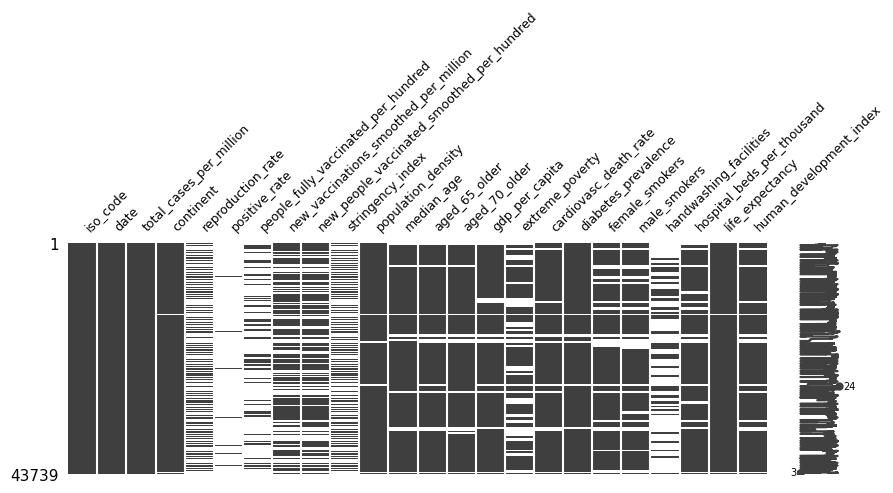

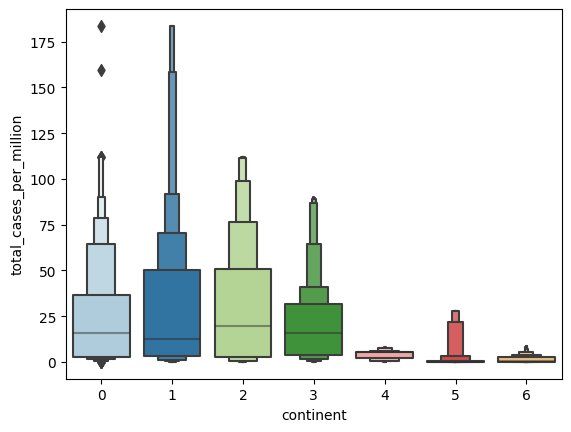

In [5]:
msno.matrix(dfm1, figsize=(10,3), fontsize=9)
dfm1.isna().sum(0)/dfm1.shape[0]*100

# drop NA more than 50%
col1 = dfm1.columns[dfm1.isna().sum(0)/dfm1.shape[0] < 0.5]
dfm2 = dfm1[col1].copy()
display(dfm2.isna().sum(0)/dfm1.shape[0]*100)

# NA fill 1
dfm2.continent.fillna("Other", inplace=True)
col2 = dfm2.columns[6:]
dfm2.fillna(dfm2.groupby("iso_code")[col2].transform("mean"), inplace=True)
display(dfm2.isna().sum(0)/dfm1.shape[0]*100)

# NA fill 2
dfm2.fillna(dfm2.groupby("continent")[col2].transform("mean"), inplace=True)
display(dfm2.isna().sum(0)/dfm1.shape[0]*100)

# NA fill 3
display(dfm2.tail(12))
dfm2=dfm2.fillna(dfm2.groupby("iso_code").fillna(method="ffill").fillna(method="bfill"))
display(dfm2.isna().sum(0)/dfm1.shape[0]*100)

# Labelling Continent
dfm2.continent.replace(['Europe', 'Other', 'South America', 'North America', 'Oceania','Asia', 'Africa'], [1,0,2,3,4,5,6], inplace=True)

plt.figure()
sns.boxenplot(dfm2, x="continent", y='total_cases_per_million', palette='Paired')

In [6]:
# plt.figure()
# sns.pairplot(dfm2.iloc[:,:5])

<Axes: >

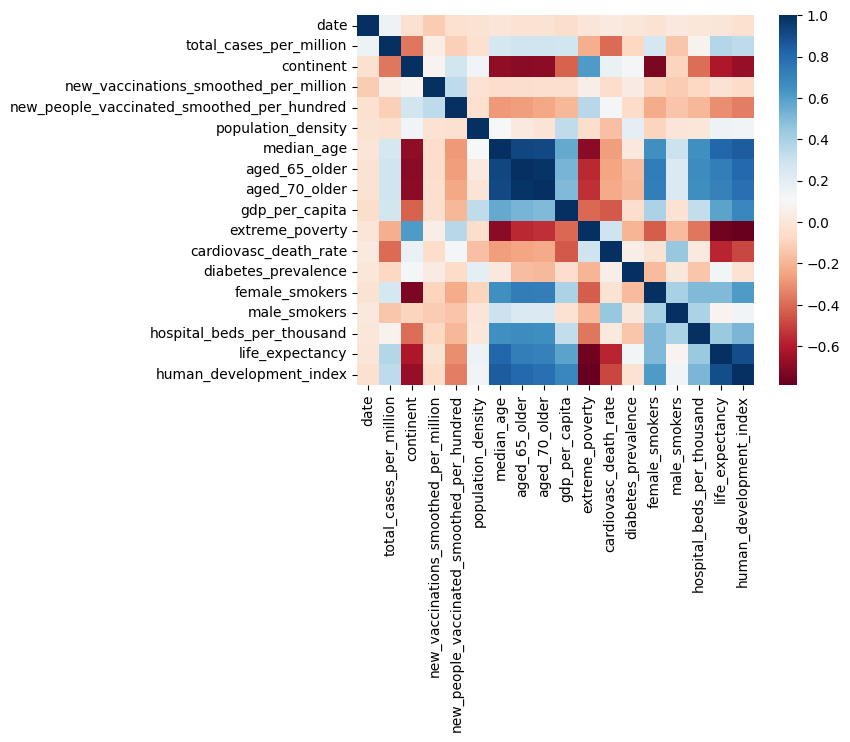

In [7]:
plt.figure()
sns.heatmap(dfm2.select_dtypes(exclude="object").corr(), cmap="RdBu", annot=False)

In [8]:
df4 = pd.merge(dfm2, df3[["t30", "iso_code", "new_vaccinations_smoothed_per_million", "new_people_vaccinated_smoothed_per_hundred"]], 
               left_on=["date", "iso_code"], right_on=["t30", "iso_code"],
               how="left",suffixes=["", "_30"])

df4 = pd.merge(df4, df3[["t90", "iso_code", "new_vaccinations_smoothed_per_million", "new_people_vaccinated_smoothed_per_hundred"]], 
               left_on=["date", "iso_code"], right_on=["t90", "iso_code"],
               how="left",suffixes=["_00", "_90"])

df4.drop(columns=["t30", "t90", "new_vaccinations_smoothed_per_million_00", "new_people_vaccinated_smoothed_per_hundred_00"], inplace=True)
df4 = df4.fillna(df4.groupby("iso_code").fillna(method="ffill").fillna(method="bfill"))

### Ehm. Modelling

,continent,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,new_vaccinations_smoothed_per_million_30,new_people_vaccinated_smoothed_per_hundred_30,new_vaccinations_smoothed_per_million_90,new_people_vaccinated_smoothed_per_hundred_90
35279,3,590533.0,35.223493,10.917359,7.186321,2.247494e+07,3.842992,171.796722,10.077882,7.387525,21.970164,2.302272,82.08,0.783686,495.0,0.007,495.0,0.007
13648,2,66939.0,28.100000,7.104000,4.458000,1.058194e+07,3.600000,140.448000,5.550000,2.000000,12.300000,1.500000,77.01,0.759000,966.0,0.004,263.0,0.002
16381,1,237016.0,46.600000,21.453000,15.957000,4.522924e+07,0.760436,156.139000,8.310000,28.200000,33.100000,8.000000,81.33,0.947000,760.0,0.001,580.0,0.000
28293,1,193475.0,42.376104,18.140586,12.084438,3.329634e+07,0.760436,214.450230,5.460000,24.196619,34.455147,13.800000,86.75,0.887953,7.0,0.002,154.0,0.001
31249,3,55133.0,29.700000,7.918000,5.030000,2.226704e+07,2.200000,128.346000,8.330000,2.400000,9.900000,2.300000,78.51,0.815000,180.0,0.002,255.0,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1,6518.0,44.700000,20.801000,13.272000,1.856331e+07,1.500000,424.688000,5.810000,30.100000,44.400000,7.454000,75.05,0.816000,1.0,0.000,1.0,0.000
11284,0,362644.0,41.700000,16.367000,10.068000,1.958562e+07,6.744516,192.661800,11.620000,10.298295,26.682036,3.023391,78.88,0.770920,126.0,0.001,126.0,0.001
38158,5,527967.0,43.400000,13.914000,8.622000,3.593837e+07,0.200000,85.998000,6.800000,6.200000,40.900000,12.270000,83.03,0.916000,32.0,0.000,32.0,0.000
860,2,16177.0,31.900000,11.198000,7.441000,1.893391e+07,0.600000,191.032000,5.500000,16.200000,27.700000,5.000000,76.67,0.845000,129.0,0.000,129.0,0.000


35279    31.431
13648    11.777
16381    42.114
28293    82.212
31249    26.766
          ...  
6265      0.885
11284    15.693
38158     0.096
860      24.830
15795    61.198
Name: total_cases_per_million, Length: 30617, dtype: float64

<Axes: xlabel='total_cases_per_million', ylabel='Count'>

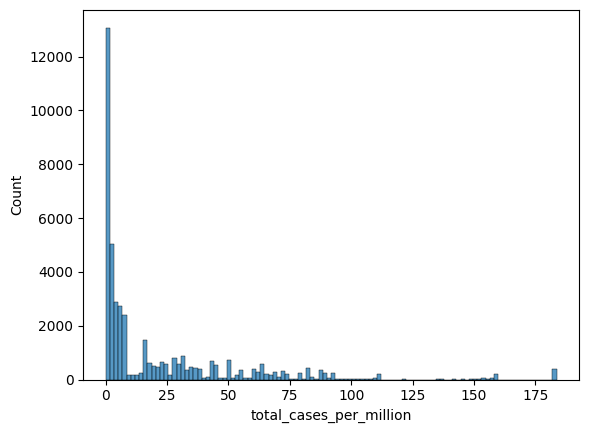

In [9]:
# Encoding, FE
X = df4.copy()
X.drop(columns=["date", "iso_code"], inplace=True)

# Splitting Data
y = X.pop("total_cases_per_million")
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size = 0.3, random_state = 42)
display(Xtr, ytr)

# View y
sns.histplot(y)

### Base Model

In [10]:
from scipy.stats import pearsonr
from sklearn.inspection import permutation_importance

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as imbpipeline
import pandas as pd

# FOLD
rkf = RepeatedKFold(n_splits=3, n_repeats=2, random_state=0)

In [11]:
X1 = Xtr.copy()
y1 = ytr.copy()

kat_kol = X1.select_dtypes("object").columns
num_kol = X1.select_dtypes(exclude="object").columns

# ordinal encoder
kat_trf1 = Pipeline(steps=[
    ("kat_en", OrdinalEncoder())
])


num_trf = Pipeline(steps=[("num_im", SimpleImputer(strategy="median"))])

# merge preprocessing
pre_1 = ColumnTransformer(transformers=[
    ('kat', kat_trf1, kat_kol),
    ('num', num_trf, num_kol)
])



In [12]:
# Define a list of regression models
models = [
    LinearRegression(),
    ElasticNet(random_state=42),
    
    RandomForestRegressor(random_state=42),
    HistGradientBoostingRegressor(random_state=42),
    XGBRegressor(random_state=42),
    LGBMRegressor(random_state=42),
]

res1 = []

for model in models:
    pipa = imbpipeline(steps=[
        ("pre", pre_1),
        ("clf", model)
    ])
    
    grid_search = GridSearchCV(estimator=pipa, param_grid = {}, cv=rkf, scoring='neg_root_mean_squared_error', verbose=1)
    
    grid_search.fit(X1, y1)
    
    # Save the model's performance metrics in a dictionary
    result = {
        'Model': type(model).__name__,
        'RMSE1': -1*grid_search.best_score_
    }
    
    # Append the dictionary to the results list
    res1.append(result)

Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits


In [13]:
pd.DataFrame(res1)

,Model,RMSE1
0,LinearRegression,27.574007
1,ElasticNet,27.710608
2,RandomForestRegressor,5.782414
3,HistGradientBoostingRegressor,6.131059
4,XGBRegressor,5.837569
5,LGBMRegressor,6.102186


### RF
1. Eak
        Best Parameter {'clf__min_samples_leaf': 1, 'clf__n_estimators': 200}
        Best Scorer -6.42968568815336
2. Eak
        Best Parameter {'clf__bootstrap': True, 'clf__min_samples_leaf': 2, 'clf__n_estimators': 200}
        Best Scorer -6.42682914477797

In [14]:
rf1 = imbpipeline(steps=[
    ("preprocess", pre_1),
    ("clf", RandomForestRegressor(random_state=0))
])


param_grid = {
    'clf__n_estimators': [150],
    'clf__min_samples_leaf': [1],
    'clf__bootstrap': [True],
    'clf__min_samples_split': [2],
}

grid_rf1 = GridSearchCV(estimator=rf1, param_grid=param_grid, cv=rkf, scoring={"mse": 'neg_mean_squared_error',
                                                                               "rsq": 'r2',
                                                                               "rmse": 'neg_root_mean_squared_error',
                                                                               "mae": 'neg_mean_absolute_error'}, 
                         verbose = 3, refit="rmse")


# Melakukan tuning hyperparameter
grid_rf1.fit(X1, y1)

# Mendapatkan model terbaik
print("Best Parameter", grid_rf1.best_params_)
print("Best Scorer", grid_rf1.best_score_)

Fitting 6 folds for each of 1 candidates, totalling 6 fits
[CV 1/6] END clf__bootstrap=True, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=150; mae: (test=-1.190) mse: (test=-27.943) rmse: (test=-5.286) rsq: (test=0.972) total time=   9.4s
[CV 2/6] END clf__bootstrap=True, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=150; mae: (test=-1.210) mse: (test=-31.830) rmse: (test=-5.642) rsq: (test=0.970) total time=   8.7s
[CV 3/6] END clf__bootstrap=True, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=150; mae: (test=-1.328) mse: (test=-39.768) rmse: (test=-6.306) rsq: (test=0.963) total time=   8.7s
[CV 4/6] END clf__bootstrap=True, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=150; mae: (test=-1.255) mse: (test=-34.889) rmse: (test=-5.907) rsq: (test=0.967) total time=   8.6s
[CV 5/6] END clf__bootstrap=True, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=150; mae: (test=-1.222

In [15]:
grid_rf1.best_estimator_.get_params()["clf"].get_params()
display(pd.DataFrame(grid_rf1.cv_results_).filter(regex='^mean',axis=1))

,mean_fit_time,mean_score_time,mean_test_mse,mean_test_rsq,mean_test_rmse,mean_test_mae
0,8.534669,0.249599,-33.493408,0.968214,-5.775959,-1.238787


### XGB

In [16]:
# xg1 = imbpipeline(steps=[
#     ("preprocess", pre_1),
#     ("clf", XGBRegressor(random_state=0))
# ])


# param_grid = {
# #     'clf__n_estimators': [50, 100, 200],
#     'clf__learning_rate': [None], 
# #     'clf__max_depth': [None],
# #     'clf__min_child_weight': [5, None],
    
# }


# grid_xg1 = GridSearchCV(estimator=xg1, param_grid=param_grid, cv=rkf, 
#                         scoring={"mse": 'neg_mean_squared_error',
#                                  "rsq": 'r2',
#                                  "rmse": 'neg_root_mean_squared_error',
#                                  "mae": 'neg_mean_absolute_error'}, 
#                          verbose = 3, refit="rmse")


# # Melakukan tuning hyperparameter
# grid_xg1.fit(X1, y1)


# # Mendapatkan model terbaik
# print("Best Parameter", grid_xg1.best_params_)
# print("Best Scorer", grid_xg1.best_score_)

In [17]:
# grid_xg1.best_estimator_.get_params()["clf"].get_params()

### FI

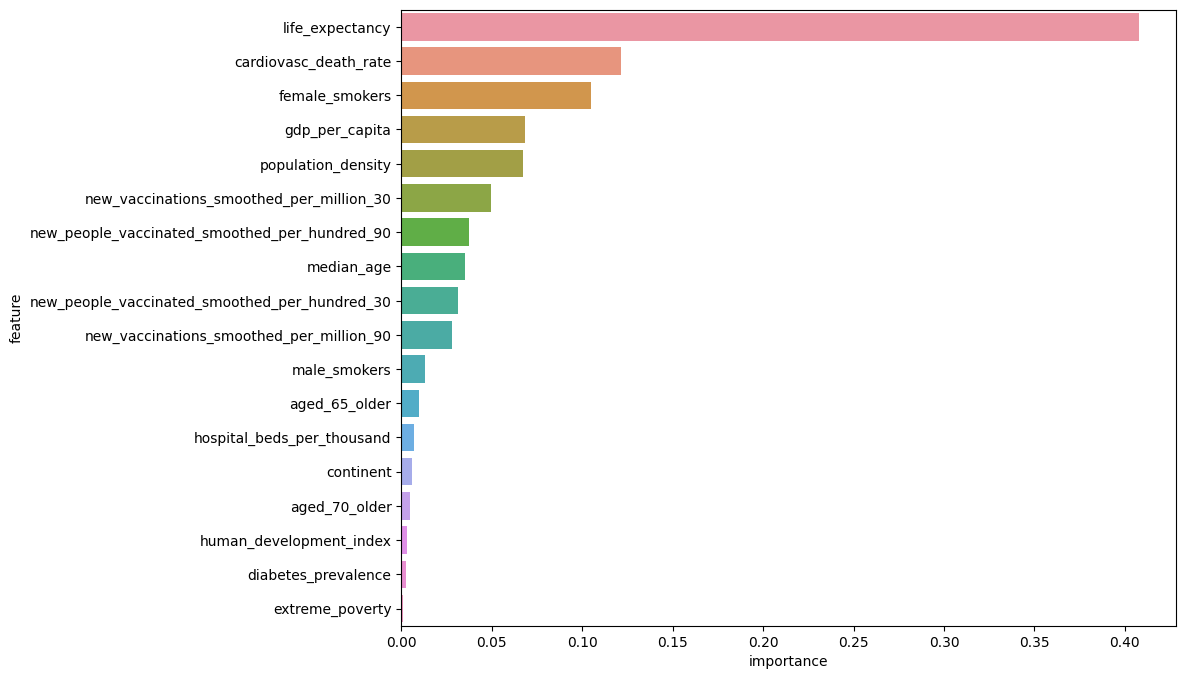

In [18]:
# GOOD FI
# fitur1 = [j.split("__")[1] for j in grid_xgb1.best_estimator_.named_steps["preprocess"].get_feature_names_out()]
# imp1 = pd.DataFrame({'feature': fitur1, 
#                      'importance': grid_xgb1.best_estimator_.named_steps["clf"].feature_importances_})
# imp1 = imp1.sort_values('importance', ascending=False).reset_index(drop=True)

# plt.figure(figsize=(10, 8))
# sns.barplot(x='importance', y='feature', data=imp1)

fitur2 = [j.split("__")[1] for j in grid_rf1.best_estimator_.named_steps["preprocess"].get_feature_names_out()]
imp2 = pd.DataFrame({'feature': fitur2, 
                     'importance': grid_rf1.best_estimator_.named_steps["clf"].feature_importances_})
imp2 = imp2.sort_values('importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=imp2)

plt.show()

<Axes: >

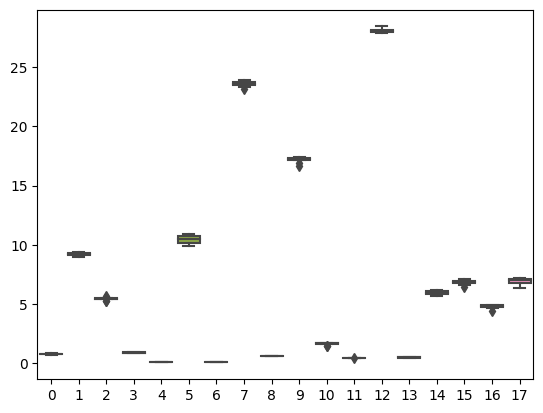

In [19]:
perm = permutation_importance(grid_rf1, Xte, yte, n_repeats=10,
                       random_state=0, n_jobs=-1)
sns.boxplot(perm["importances"].transpose())

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


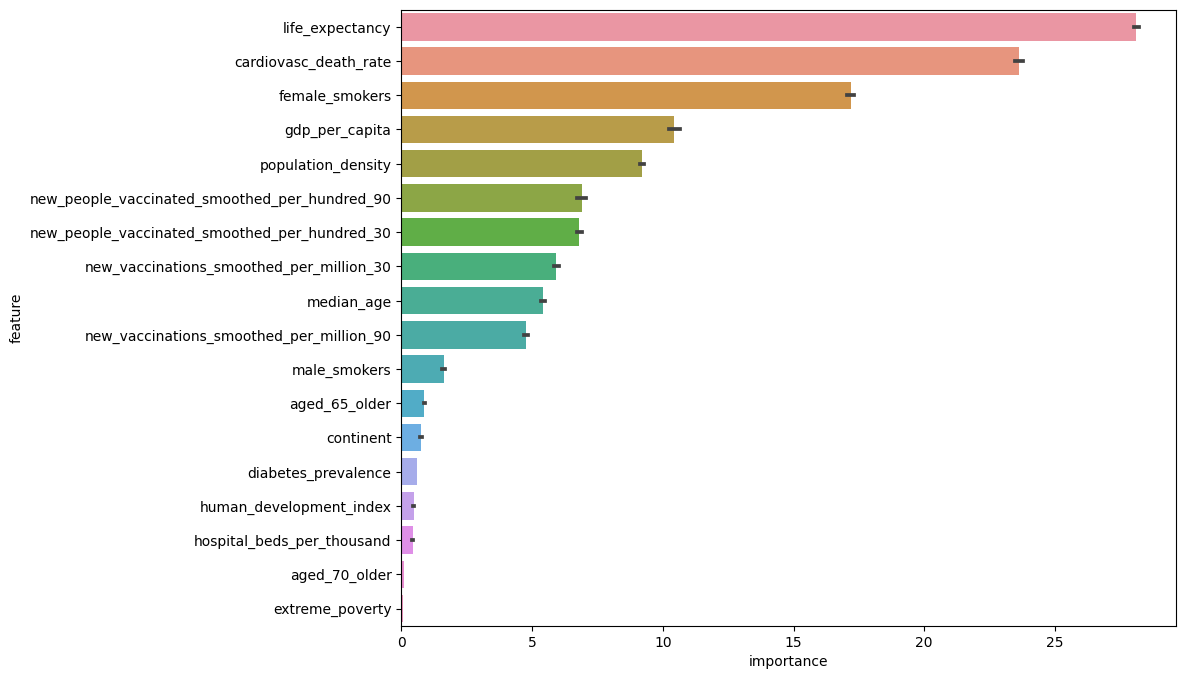

<Figure size 1000x800 with 0 Axes>

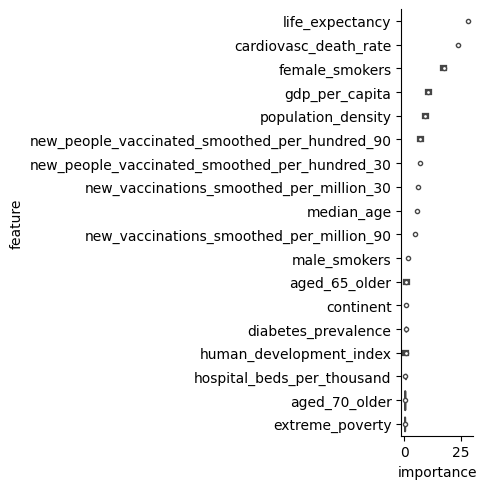

In [20]:
perm["importances_mean"]
perm2 = pd.DataFrame({'feature': Xte.columns.tolist()*10, 
                     'importance': perm["importances"].transpose().reshape(-1)})
# perm2 = perm2.sort_values('importance', ascending=False).reset_index(drop=True)
perm2["importance"] = perm2["importance"]

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=perm2, 
            order=perm2.groupby("feature").mean().sort_values("importance", ascending=False).index)

plt.figure(figsize=(10, 8))
sns.catplot(x='importance', y='feature', data=perm2, kind="violin",
            order=perm2.groupby("feature").mean().sort_values("importance", ascending=False).index)

In [21]:
# perm = permutation_importance(grid_xg1, Xte, yte, n_repeats=10,
#                        random_state=0, n_jobs=-1)
# sns.boxplot(perm["importances"].transpose())

In [22]:
# perm["importances_mean"]
# perm2 = pd.DataFrame({'feature': Xte.columns.tolist()*10, 
#                      'importance': perm["importances"].transpose().reshape(-1)})
# # perm2 = perm2.sort_values('importance', ascending=False).reset_index(drop=True)
# perm2["importance"] = perm2["importance"]

# plt.figure(figsize=(10, 8))
# sns.barplot(x='importance', y='feature', data=perm2, 
#             order=perm2.groupby("feature").mean().sort_values("importance", ascending=False).index)

# plt.figure(figsize=(10, 8))
# sns.catplot(x='importance', y='feature', data=perm2, kind="violin",
#             order=perm2.groupby("feature").mean().sort_values("importance", ascending=False).index)

In [23]:
plt.show()

<Axes: xlabel='importance', ylabel='feature'>

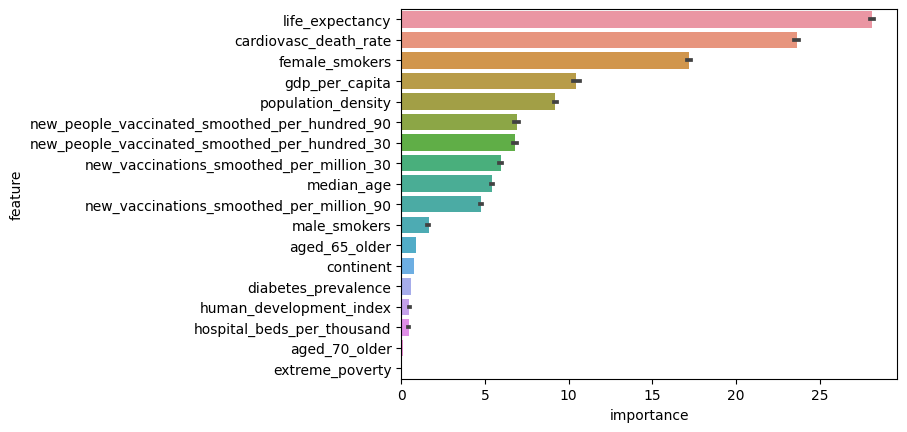

In [24]:
sns.barplot(x='importance', y='feature', data=perm2, 
            order=perm2.groupby("feature").mean().sort_values("importance", ascending=False).index)

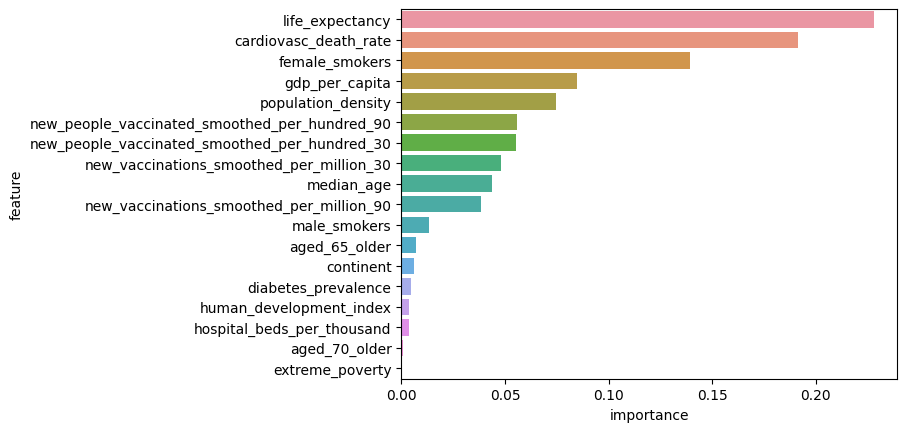

In [25]:
perm3 = perm2.groupby("feature").mean().sort_values("importance", ascending=False).reset_index()
perm3["importance"] = perm3["importance"]/ perm3["importance"].sum()
sns.barplot(perm3, x="importance", y="feature")
plt.show()

In [26]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [27]:
# takes yearssssssssss.
def moData(model, data, pre="preprocess", clf="clf"):
    pre = model.best_estimator_.named_steps[pre]
    data = pre.transform(data)
    fitur = [j.split("__")[1] for j in pre.get_feature_names_out()]
    mod = model.best_estimator_.named_steps[clf]
    dat = pd.DataFrame(data, columns=fitur)
    return mod, dat

    
def idShap(model, data, pre="preprocess", clf="clf", en = 1):
    mod, dat = moData(model, data)
    
    # individual
    datn = dat.iloc[(en-1):en,:]
    explainer = shap.TreeExplainer(mod, approximate=True)
    shap_values = explainer.shap_values(datn)
    return shap.force_plot(explainer.expected_value, shap_values, datn, matplotlib=True, show=False, contribution_threshold=0.05)

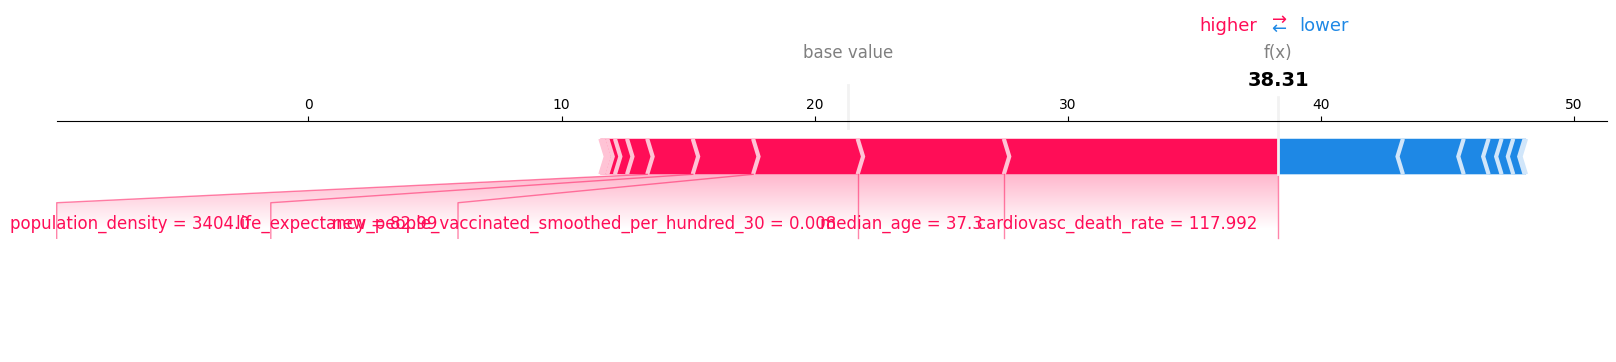

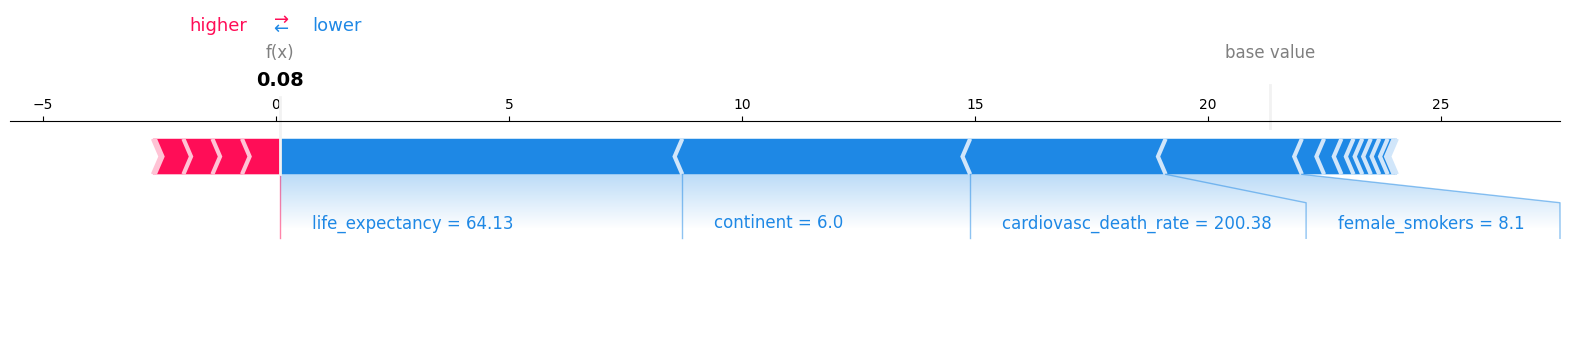

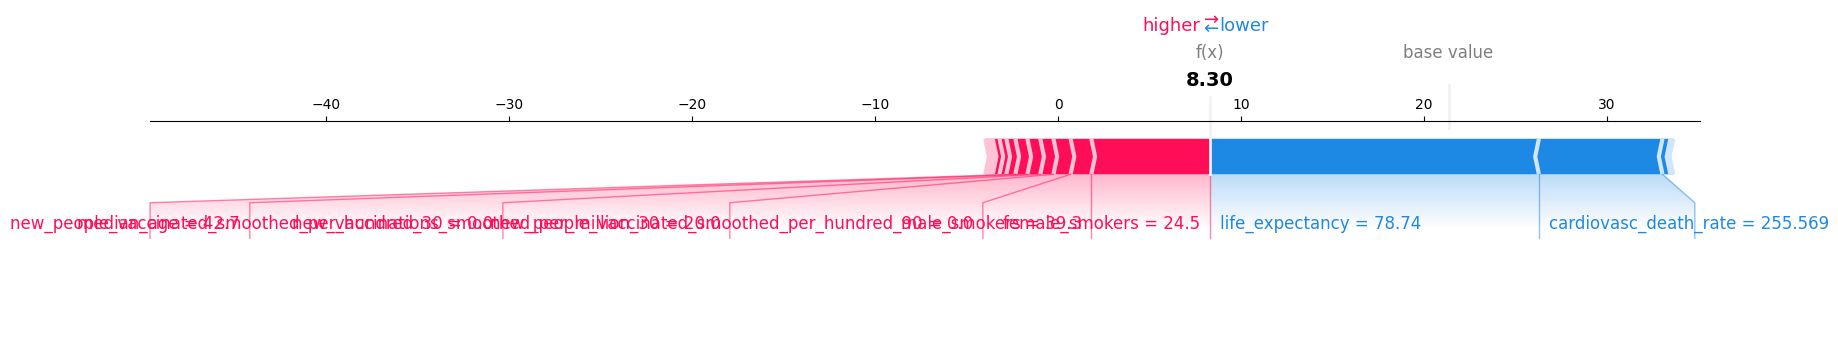

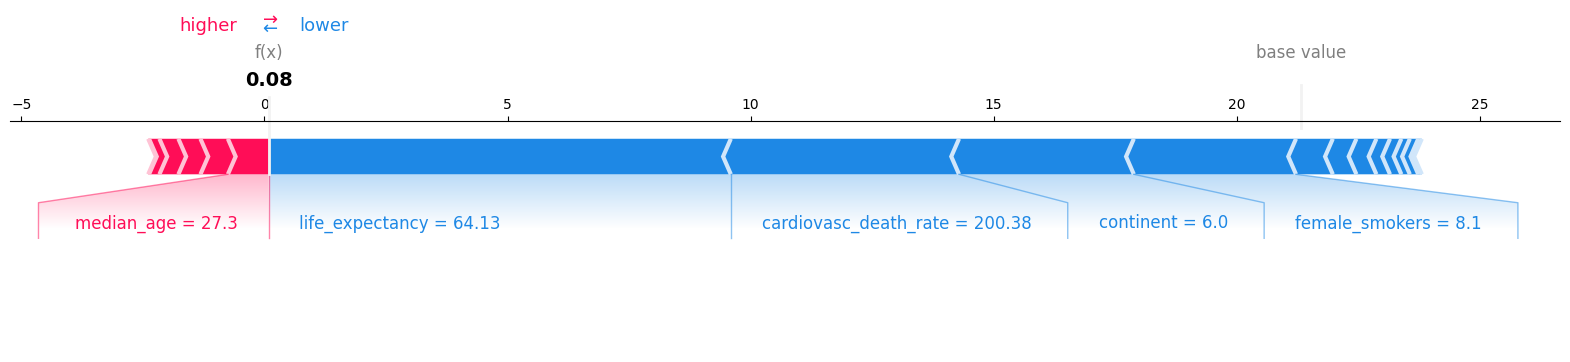

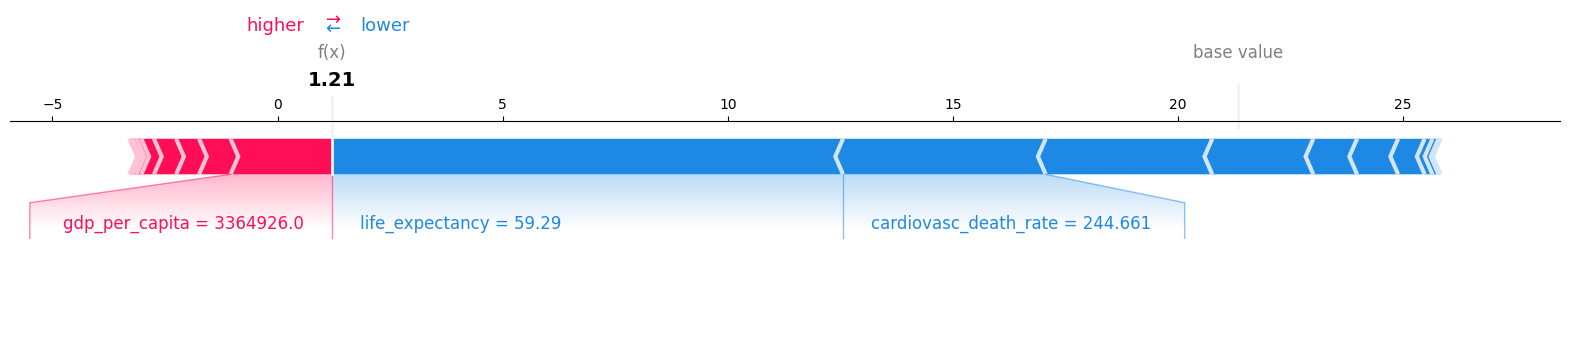

In [28]:
for j in range(1,6):
    idShap(grid_rf1, Xte, en=j)

plt.show()
plt.tight_layout()

In [29]:
def id_shap1(model, data, pre="preprocess", clf="clf", which="all"):
    mod, dat = moData(model, data)
    shapval = shap.TreeExplainer(mod, approximate=True).shap_values(dat)
    return shapval, dat

def pl_shap1(val, data):
    shap.summary_plot(val, data)
    shap.summary_plot(val, data, plot_type="violin", color='coolwarm')

def pl_shap2(val, data):
    fig, axes = plt.subplots(5, 5, figsize=(20,16))
    axes = axes.ravel()
    display(axes)
    
    for i, var in enumerate(data.columns):
        shap.dependence_plot(var, val, data, ax=axes[i], show=False)   
    plt.tight_layout()


XA, XB, ya, yb =    train_test_split(Xte, yte, test_size = 0.9, random_state = 42)

valx, datx = id_shap1(grid_rf1, XA)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
The figure layout has changed to tight


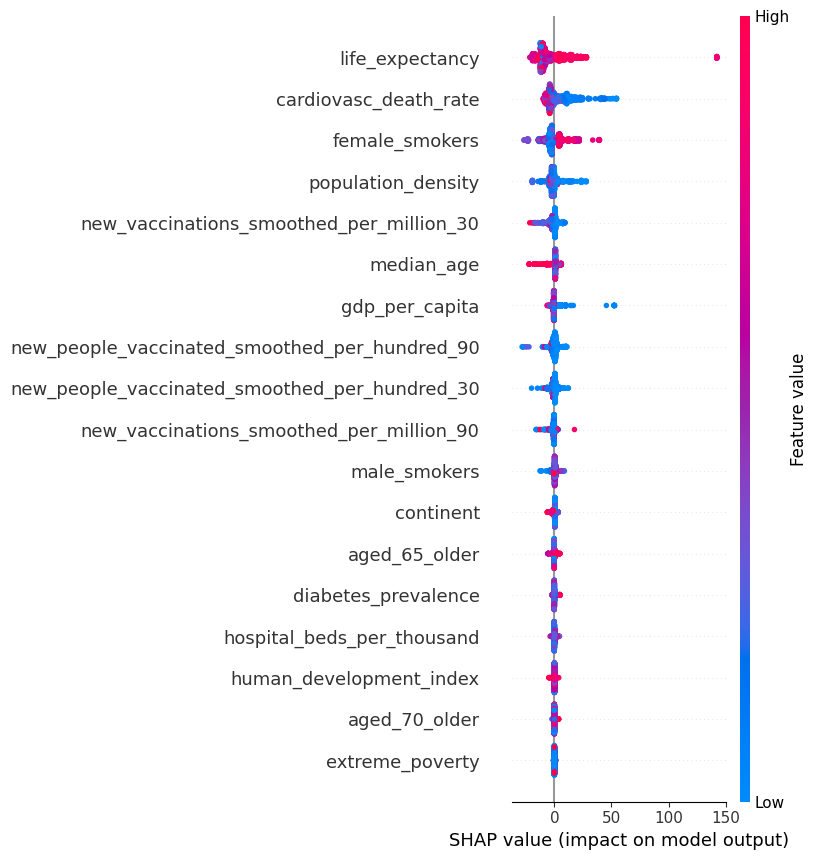

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


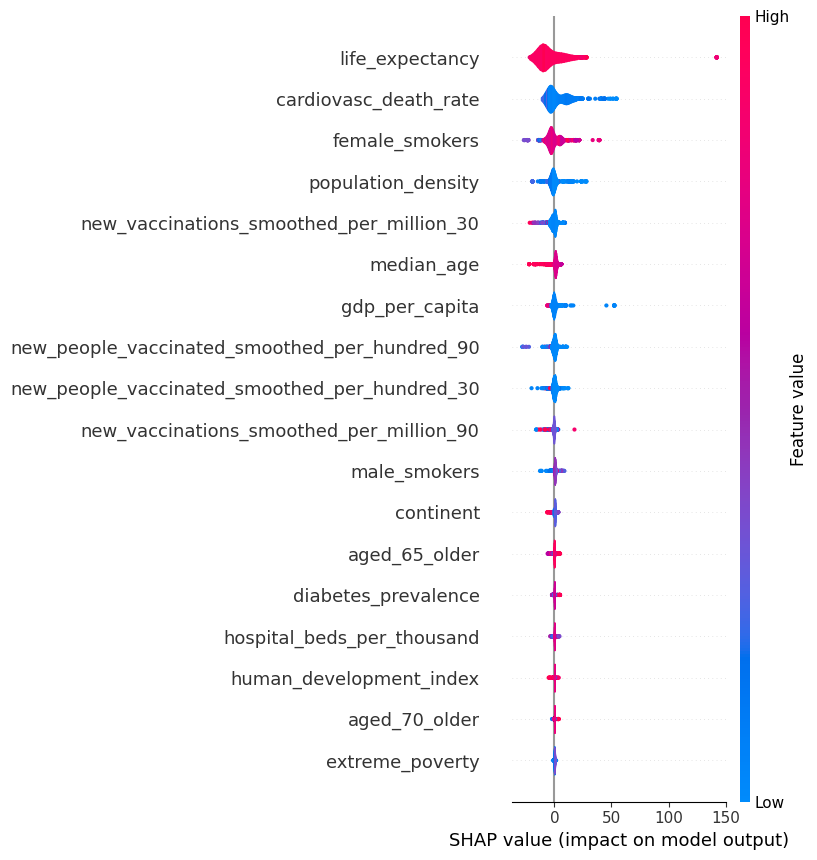

In [30]:
pl_shap1(valx, datx)
plt.show()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

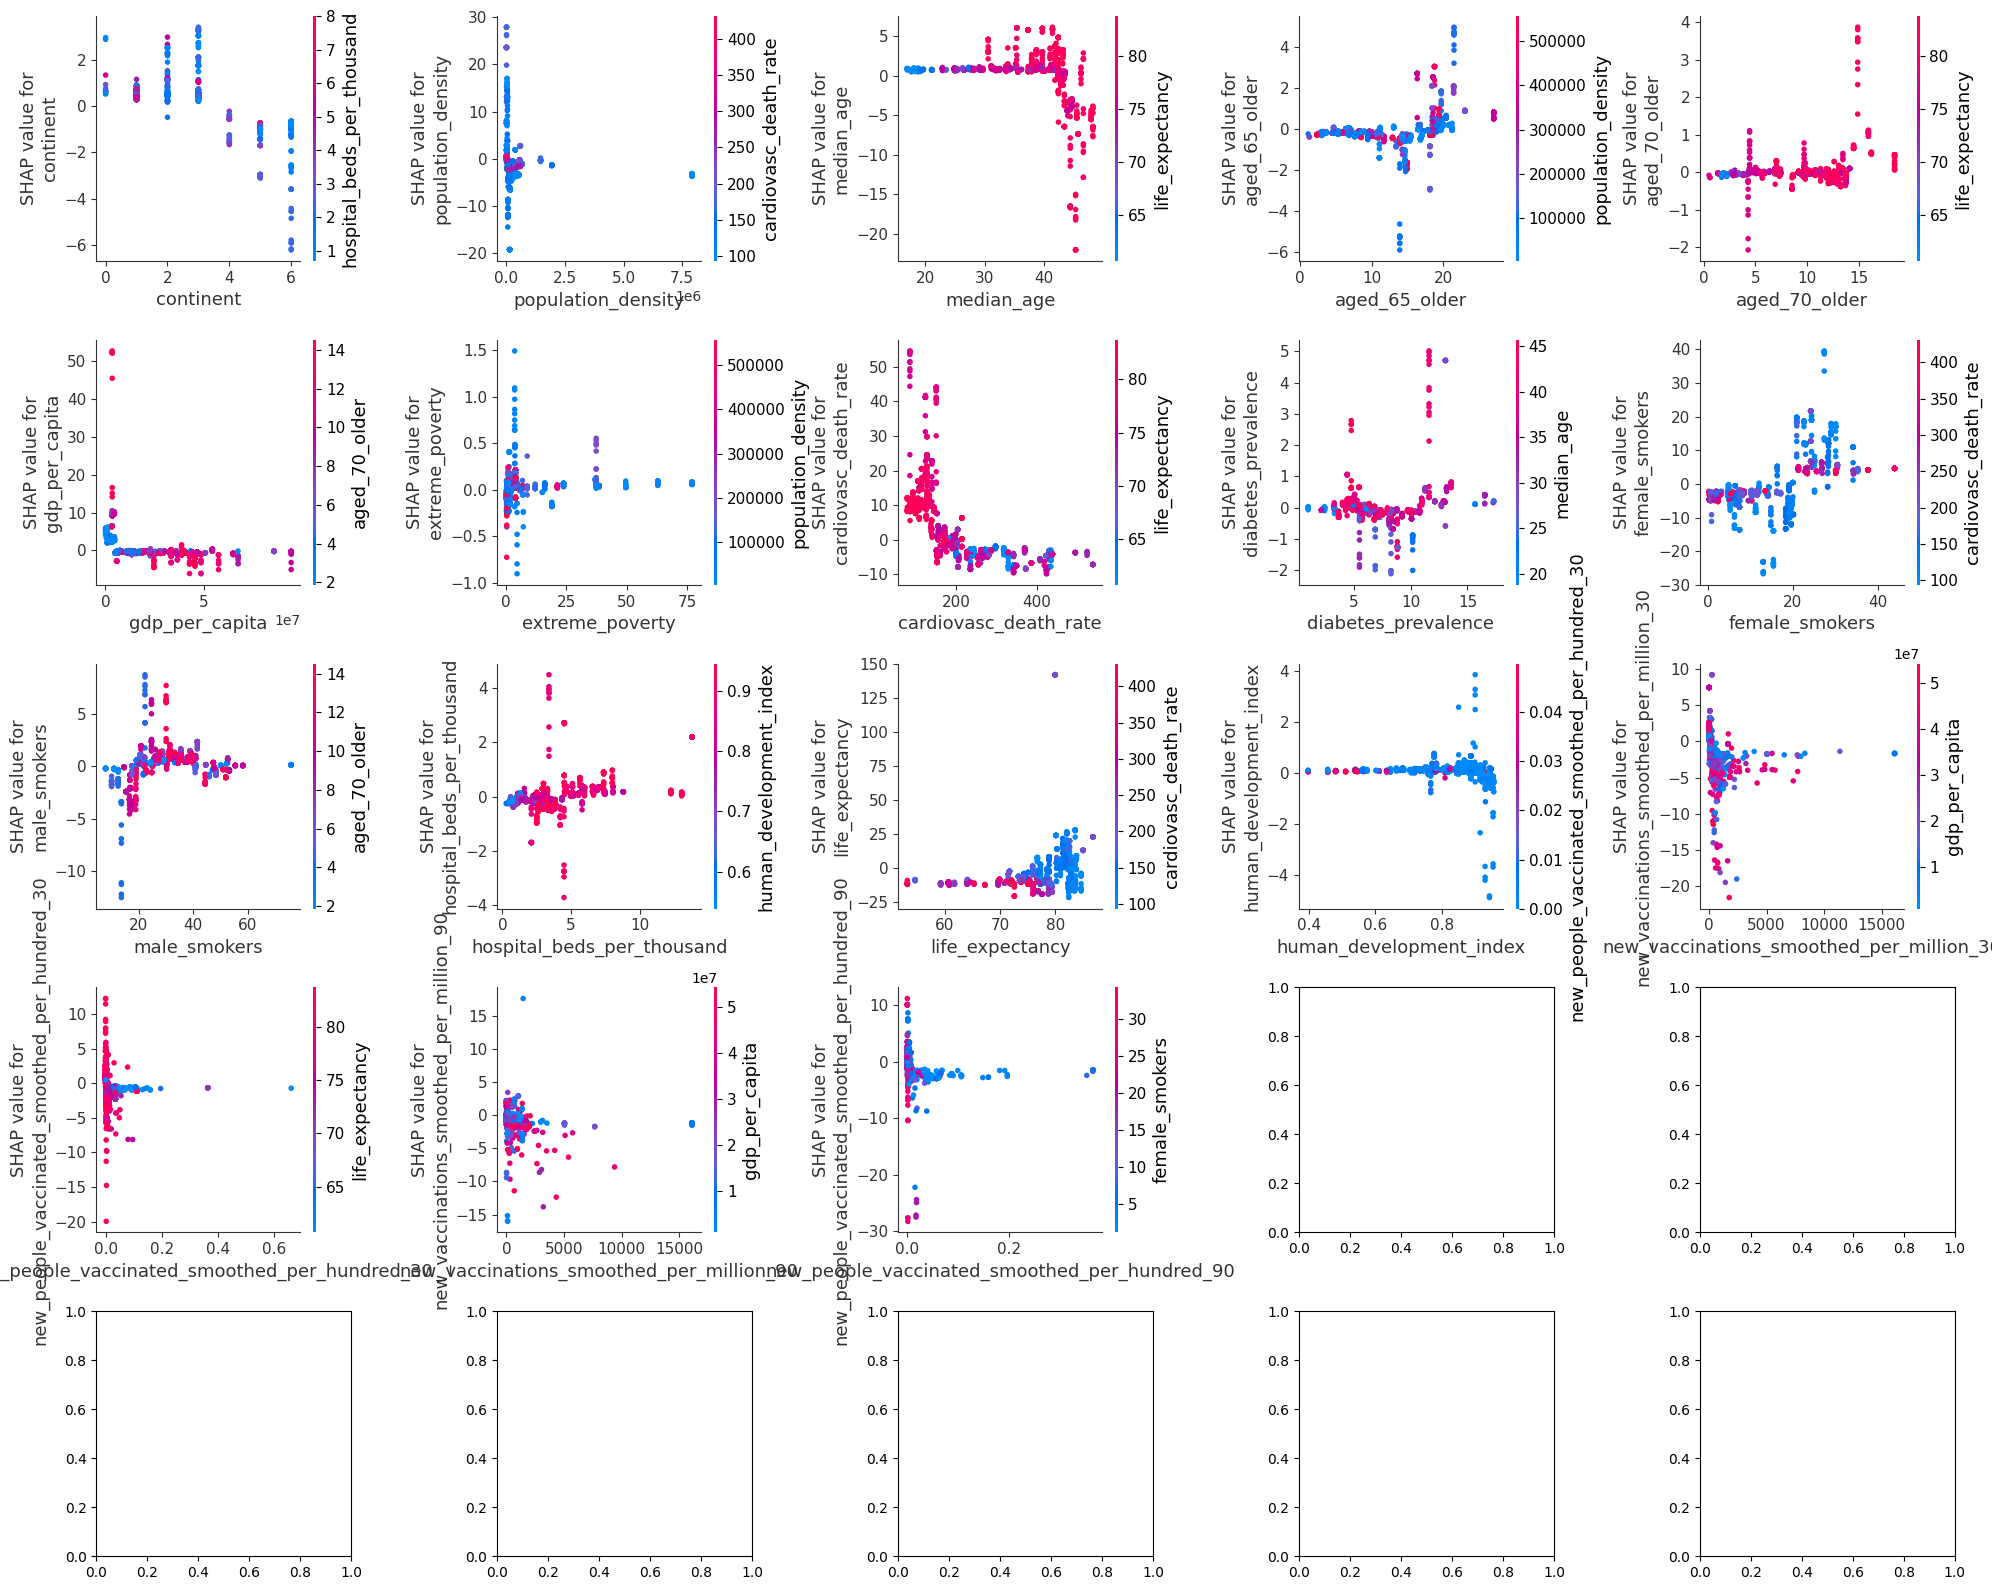

In [31]:
pl_shap2(valx, datx)
plt.show()

In [32]:
sum(df4.iloc[:, 2:].duplicated())/df4.shape[0]

# awoakokoko #aowkaokokk
df5 = df4.iloc[:,2:].drop_duplicates()


,continent,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,new_vaccinations_smoothed_per_million_30,new_people_vaccinated_smoothed_per_hundred_30,new_vaccinations_smoothed_per_million_90,new_people_vaccinated_smoothed_per_hundred_90
21158,5,450419.0,28.2,5.989,3.414,6426674.0,21.200000,282.280,10.39,1.9,20.6,0.530,69.66,0.645,93.0,0.001,43.0,0.000
39697,1,24718.0,41.0,19.985,13.433,46949283.0,0.500000,133.982,4.79,18.8,18.9,2.220,82.80,0.945,277.0,0.000,20.0,0.000
5982,1,6518.0,44.7,20.801,13.272,18563307.0,1.500000,424.688,5.81,30.1,44.4,7.454,75.05,0.816,174.0,0.001,43.0,0.000
33109,1,112371.0,46.2,21.502,14.924,27936896.0,0.500000,127.842,9.85,16.3,30.0,3.390,82.05,0.864,177.0,0.001,3515.0,0.001
38323,1,93105.0,45.5,19.436,13.799,3427236.0,1.000000,99.403,7.17,27.4,31.4,2.970,83.56,0.904,253.0,0.001,88.0,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29535,1,508544.0,43.2,18.779,11.881,48472545.0,0.760436,109.361,5.29,24.4,27.3,3.320,82.28,0.944,55.0,0.000,7.0,0.000
31069,3,55133.0,29.7,7.918,5.030,22267037.0,2.200000,128.346,8.33,2.4,9.9,2.300,78.51,0.815,437.0,0.004,259.0,0.006
13363,3,222873.0,27.6,6.981,4.419,14600861.0,1.600000,266.653,8.20,8.5,19.1,1.600,74.08,0.756,84.0,0.001,53.0,0.002
1748,1,106749.0,44.4,19.202,13.748,45436686.0,0.700000,145.183,6.35,28.4,30.9,7.370,81.54,0.922,1122.0,0.001,935.0,0.001


21158     0.008
39697    24.646
5982      0.885
33109    57.249
38323     0.841
          ...  
29535    71.738
31069     0.454
13363     4.631
1748      0.447
41681    13.480
Name: total_cases_per_million, Length: 11610, dtype: float64

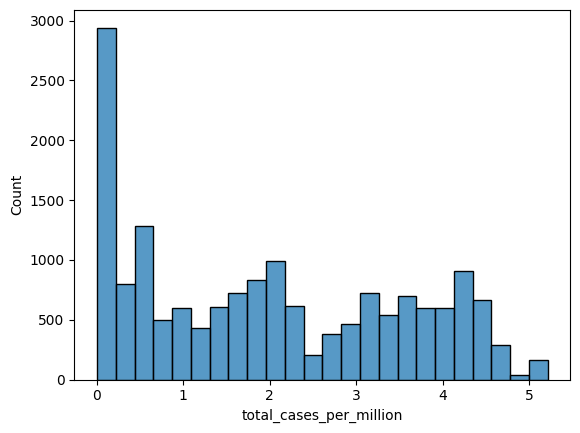

In [33]:
# Encoding, FE
X5 = df5.copy()

# Splitting Data
y5 = X5.pop("total_cases_per_million")
Xtr5, Xte5, ytr5, yte5 = train_test_split(X5, y5, test_size = 0.3, random_state = 42)
display(Xtr5, ytr5)

# View y
plt.figure()
sns.histplot(np.log1p(y5))
plt.show()

In [34]:
kat_kol5 = X5.select_dtypes("object").columns
num_kol5 = X5.select_dtypes(exclude="object").columns

# ordinal encoder
kat_trf5 = Pipeline(steps=[
    ("kat_en", OrdinalEncoder())
])


num_trf5 = Pipeline(steps=[("num_im", SimpleImputer(strategy="median"))])

# merge preprocessing
pre_5 = ColumnTransformer(transformers=[
    ('kat', kat_trf5, kat_kol5),
    ('num', num_trf5, num_kol5)
])

rf5 = imbpipeline(steps=[
    ("preprocess", pre_5),
    ("clf", RandomForestRegressor(random_state=0))
])


param_grid = {
#     'clf__n_estimators': [150],
#     'clf__min_samples_leaf': [1],
#     'clf__bootstrap': [True],
#     'clf__min_samples_split': [2],
}

grid_rf5 = GridSearchCV(estimator=rf5, param_grid=param_grid, cv=rkf, scoring={"mse": 'neg_mean_squared_error',
                                                                               "rsq": 'r2',
                                                                               "rmse": 'neg_root_mean_squared_error',
                                                                               "mae": 'neg_mean_absolute_error'}, 
                         verbose = 3, refit="rmse")


# Melakukan tuning hyperparameter
grid_rf5.fit(X5, np.log1p(y5))

# Mendapatkan model terbaik
print("Best Parameter", grid_rf5.best_params_)
print("Best Scorer", grid_rf5.best_score_)

Fitting 6 folds for each of 1 candidates, totalling 6 fits
[CV 1/6] END  mae: (test=-0.075) mse: (test=-0.043) rmse: (test=-0.207) rsq: (test=0.982) total time=   4.3s
[CV 2/6] END  mae: (test=-0.079) mse: (test=-0.050) rmse: (test=-0.225) rsq: (test=0.979) total time=   4.1s
[CV 3/6] END  mae: (test=-0.081) mse: (test=-0.047) rmse: (test=-0.216) rsq: (test=0.980) total time=   4.1s
[CV 4/6] END  mae: (test=-0.084) mse: (test=-0.051) rmse: (test=-0.227) rsq: (test=0.978) total time=   4.1s
[CV 5/6] END  mae: (test=-0.079) mse: (test=-0.045) rmse: (test=-0.211) rsq: (test=0.981) total time=   4.1s
[CV 6/6] END  mae: (test=-0.079) mse: (test=-0.048) rmse: (test=-0.218) rsq: (test=0.980) total time=   4.1s
Best Parameter {}
Best Scorer -0.21731529618243262


In [35]:
grid_rf5.best_estimator_.get_params()["clf"].get_params()
display(pd.DataFrame(grid_rf5.cv_results_).filter(regex='^mean',axis=1))

,mean_fit_time,mean_score_time,mean_test_mse,mean_test_rsq,mean_test_rmse,mean_test_mae
0,4.052006,0.083729,-0.047274,0.980227,-0.217315,-0.079381


In [36]:
dfgab = pd.concat([Xtr,ytr], axis =1)

In [37]:
dfgab.columns #ok

Index(['continent', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index', 'new_vaccinations_smoothed_per_million_30',
       'new_people_vaccinated_smoothed_per_hundred_30',
       'new_vaccinations_smoothed_per_million_90',
       'new_people_vaccinated_smoothed_per_hundred_90',
       'total_cases_per_million'],
      dtype='object')

Nah, what is wrong with our method?
1. shall a model be perfectly perfect?
1. kidding us?
1. hmm isolation forest? by what dude, what? ah, using train data ofc
1. then, usual modelling
1. or, we can aggregate by week, month first, isolation forest, then modelling #1 lagged vaccines vs y var, find the most important ones. then usual modelling.
1. else, do?
1. i guess thats it?
1. okeu.
done dude, done.

In [38]:
dfm1.isna().sum()/dfm1.shape[0]*100

iso_code                                       0.000000
date                                           0.000000
total_cases_per_million                        0.000000
continent                                      0.589863
reproduction_rate                             59.454949
positive_rate                                 97.706852
people_fully_vaccinated_per_hundred           72.809163
new_vaccinations_smoothed_per_million         39.424770
new_people_vaccinated_smoothed_per_hundred    38.965226
stringency_index                              59.224033
population_density                             2.450902
median_age                                     7.018908
aged_65_older                                  8.879947
aged_70_older                                  8.955394
gdp_per_capita                                 8.907382
extreme_poverty                               35.430623
cardiovasc_death_rate                          7.853403
diabetes_prevalence                            4

In [39]:
dfm1.date

496     2022-07-25
497     2022-07-26
498     2022-07-27
499     2022-07-28
500     2022-07-29
           ...    
46617   2023-07-07
46618   2023-07-08
46619   2023-07-09
46620   2023-07-10
46621   2023-07-11
Name: date, Length: 43739, dtype: datetime64[ns]

In [40]:
sns.histplot(dfm1.groupby(["iso_code", pd.Grouper(key='date', freq='M')])["total_cases_per_million"].mean())

plt.figure()
sns.histplot(y)

<Axes: xlabel='total_cases_per_million', ylabel='Count'>